# BUILDING TEXT CLASSIFICATION MODEL

**Text classification is an application of NLP.**<br/>
For example- Whenever a spam email comes to the the gmail it goes automatically to spam folder. This happens because Gmail uses a spam filter. And spam filter is nothing but a text classifier. Some email goes to normal inbox and some to the spam folder based on the data contained in the whole email. Based on email content, spam filter can classify emails as spam or real emails. 

Similarly a sentiment classifier could be build by using text classification as well, telling us whether a document has positive or negative sentiment associated with it.

In [285]:
# Text Classifiation using NLP

# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sayantan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [286]:
%pwd

'/Users/sayantan/Desktop/Datascience_Master/Hands-On-Natural-Language-Processing-with-Python-master/Section 7 - Text Classification'

In [287]:
%cd /Users/sayantan/Desktop/Datascience_Master/Hands-On-Natural-Language-Processing-with-Python-master/Section 7 - Text Classification

/Users/sayantan/Desktop/Datascience_Master/Hands-On-Natural-Language-Processing-with-Python-master/Section 7 - Text Classification


In [288]:
# Importing the dataset
reviews = load_files('txt_sentoken')
X,y = reviews.data,reviews.target

In [289]:
len(X), len(y)

(2000, 2000)

`txt_sentoken` has 2 folders. One folder contains positive sentiment containing text and another folder contains negative sentiment containing text files. Now `load_files` will generate 2 classes. For negative sentiment folder it will generate a class 0 (label 0) for each text file and for positive sentiment folder, it will generate class 1 (label 1) for each text file.

Therefore, X will have all 1000 positive and 1000 negative text files, making it of length 2000. y will have class labels of each of the 2000 text files.

In [290]:
# 1st text file among 2000 +ve and -ve sentiment text files
X[:1]

[b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is

In [291]:
# class labels of 0 or 1 of each text file
y[:5]

array([0, 1, 1, 0, 1])

Here the file is of length 2000, but if file is really long then `load_files` function can take really long time to load all the files. 

**So to make the process faster after we have got `X` and `y`, we can store this `X` and `y` as pickle file in python.** 

In [292]:
# Storing as Pickle Files

# Pickling the dataset
with open('X.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('y.pickle','wb') as f:
    pickle.dump(y,f)

Pickle files are byte type files. And to write (`w`) to a byte (`b`) type files; the mode we have to use is `wb` 

To unpickle the dataset we have to read from byte type file and thus mode we have to use is `rb`. Suppose we didnot have original X and y here. We have got the dataset from net/client as pickle file then following unpickling would be necessary. 

This is great because unpickling the pickle files will take few seconds for even big dataset where as `load_files` will take over 10 minutes

In [293]:
# Unpickling dataset
X_in = open('X.pickle','rb')
y_in = open('y.pickle','rb')
X = pickle.load(X_in)
y = pickle.load(y_in)

In [294]:
len(X), len(y)

(2000, 2000)

In [295]:
# Creating the corpus (list of documents)
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i])) # substitute non-word characters with a space
    review = review.lower()                # lowering all characters
    review = re.sub(r'^br$', ' ', review)  #  
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review) # remove single letter characters (not impt for text classification)
    review = re.sub(r'^b\s+', '', review) # remove single letter character even at beginning of string
    review = re.sub(r'\s+', ' ', review)  # remove extra spaces
    corpus.append(review)  

In [296]:
corpus[:1] # cleaned up version

['arnold schwarzenegger has been an icon for action enthusiasts since the late 80 but lately his films have been very sloppy and the one liners are getting worse nit hard seeing arnold as mr freeze in batman and robin especially when he says tons of ice jokes but hey he got 15 million what it matter to him nonce again arnold has signed to do another expensive blockbuster that can compare with the likes of the terminator series true lies and even eraser nin this so called dark thriller the devil gabriel byrne has come upon earth to impregnate woman robin tunney which happens every 1000 years and basically destroy the world but apparently god has chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but

**Here we will create a BOW model and then convert it into TF-IDF model**

In [297]:
# Creating the BOW model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 2010, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray() # BOW model is stored in X

`CountVectorizer` will create binary bag of words model. Following are the parameters

* `min_df`- (Minimum Document Frequency) `CountVectorizer` will exclude all words that appear in 3 or less documents

* `max_df` - (Maximum Document Frequency)- mentioned as %. This means `CountVectorizer` will exclude all words that appear in 60% of the document or more. (That way we can exclude common words that do NOT appear in stopwords)

* We also remove the stopwords.

* After all these filtering, we might end up with  20k -30k columns/feature, each representing a word. By `max_features` (2010), we are asking for top 2010 words as features after filtering (and exclude the rest)

So overall, `min_df = 3, max_df = 0.6, stop_words = stopwords.words('english')` will be done and then top 2010 words will selected among the rest.

In [298]:
X.shape

(2000, 2010)

In [299]:
X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

2000 rows will be 2000 positive and negative documents that we had in corpus. Now we see 2010 columns or features that we wanted to select that contains binary BOWs model.

Next we will **convert BOWs model into TF-IDF model.**

In [300]:
# Creating the Tf-Idf Model from BOW model
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer() # create transformer object of TfidfTransformer class
X = transformer.fit_transform(X).toarray()
X.shape

(2000, 2010)

In [301]:
X[:5] # X is now TF-IDF model

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06829645, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

This is just a test case of how to **convert BOWs model to TF-IDF model.** However, we can directly create TD-IDF model through the following code

**∆** Creating the Tf-Idf model directly<br/>
`from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()`

In [302]:
# Done to save TF-IDF model as picle file for real time twitter sentiment analysis 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [303]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [304]:
text_train.shape, text_test.shape, sent_train.shape, sent_test.shape

((1600, 2000), (400, 2000), (1600,), (400,))

Here we are splitting the dataset into train and test sets. Train set will be used for ML model to learn from it and get trained. Whereas, test set would be used to see how good the model behaves with data it has NOT seen before.

`y` contains 0 and 1, suggesting positive or negative sentiment associated with 2000 text documents.<br/>
* `sent_train`-  will contain sentiment class associated with training documents, <br/>
* `sent_test` -  will contain sentiment class associated with testing documents

In [305]:
# Training the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(text_train,sent_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [306]:
# Testing model performance
sent_pred = classifier.predict(text_test)
print(sent_pred[:10])
accuracy = round(classifier.score(text_test, sent_test)*100,2)
print('Accuracy :', accuracy)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(sent_test, sent_pred)
cm

[1 0 1 1 0 0 1 1 1 1]
Accuracy : 84.75


array([[168,  40],
       [ 21, 171]])

This model gives a decent accuracy. We are going to use this model next for performing `Twitter Sentiment Analysis` in real time. It is not possible to train the model before each tweet comes. So we will be saving this classifier as a pickle file. So we can just import it later on and use it to predict (no training).

But we can NOT just input the original tweet within `classifier.predict()`. Because it expects vectorized version of the tweet with 2000 features etc. So we will also save the TF-IDF model as a pickle file

In [307]:
# Saving our classifier
with open('classifier.pickle','wb') as f: 
    pickle.dump(classifier,f)
    
# Saving the Tf-Idf model
with open('tfidfmodel.pickle','wb') as f:
    pickle.dump(vectorizer,f)

In [308]:
# Testing our classifier

# Unpickling the classifier and vectorizer
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)    
with open('classifier.pickle','rb') as f:
    clf = pickle.load(f)
    
sample = ["You are a nice person man, have a good life"]
sample = tfidf.transform(sample).toarray() 
sentiment = clf.predict(sample)
sentiment

array([1])

No fit transform with TF-IDF as we only need to fit it to training data. Based on that fit, it will transform any new data, classifier needs to predict on.

# TWITTER SENTIMENT ANALYSIS

We have build a text classifier based on logistic regression. Here we will fetch tweets from twitter and use our classifier to perform sentiment analysis on these tweets.

In [334]:
# Install tweepy - pip install tweepy
# Importing the libraries
import tweepy # to fetch tweets efficiently from twitter
import re
import pickle
from tweepy import OAuthHandler 

**OAuthHandler** will authenticate my computer with twitter's server using access tokens, customer key/secret etc

In [378]:
# Initializing the keys
consumer_key = 's54HldEC9yUgK0F1fohlvsRRk'
consumer_secret = 'xff810a21mjD32V2PAGkOnZTsMbf00nEH7iAq43f11kp1HhwPO' 
access_token = '2179218242-aTy5CjZC5Rehupt3fviaEmqqQJ9wh3XWpfR9xgJ'
access_secret ='z4m345La3kI3gL8tUwtvSRJ9YyeLR5XTu35zRkZZFgvth'

In [409]:
# Initializing the tokens
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['beyonce']; # we are going to find tweets that has 'trump' in it
api = tweepy.API(auth,timeout=10)

In every twitter application(app) we build, 
* we will have an unique `consumer_key, consumer_secret` that will maintain authenticity of the application. 
* `access_token, access_secret` will say whether one has the right to fetch the tweets

`timeout=10` - If we do not find any tweets then after 10 seconds this api will stop looking for different tweets

In [412]:
# Fetching the top 100 recent tweets about trump from twitter
list_tweets = [] # will contain all the tweets

query = args[0]
if len(args) == 1: # we are checking that we have only 1 query
    for status in tweepy.Cursor(api.search, q=query+" -filter:retweets", lang='en', result_type='recent', geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)

`query` has to be a string. And we have initialized query with the `args[0]` i.e. trump. 

`Cursor` is a class in the `tweepy` library to fetch the tweets.

`api.search` - This mentions we are only searching for tweets that matches our specific query (which comes next). 

`q=query+" -filter:retweets"` wsearching based on query i.e. `trump` and filtering retweets of the same tweet (as we do not need repititions of the same sweet).

`lang='en'` fetching only english tweets.

`.items(100)` how many tweets we need.

`status` is a jason object. We are only appending the text part of the object. 

In [413]:
len(list_tweets)

49

In [414]:
# First 5 tweet's on trump
list_tweets[:]

['Say ‘Thank You’ to #Beyoncé, #JAY-Z and More for Headlining Global Citizen Festival: #Mandela 100 https://t.co/PJECYbN0As #globalcitizen',
 'Beyoncé – Ring the alarm\xa0(live) https://t.co/46RTRazbel https://t.co/vVskdnj2aU',
 'House of CB’s Conna Walker: Meet the young British designer loved by\xa0Beyonce https://t.co/8mrpiCj2Gc https://t.co/4W7fNPGRDV',
 'House of CB’s Conna Walker: Meet the young British designer loved by\xa0Beyonce https://t.co/qDygNTsZ0R https://t.co/cukClb6ppj',
 'can beyonce release a studio recording of sex is on fire',
 'I knew that shit was a dream when he said he had backstage passes to a Beyoncé concert. #Charmed https://t.co/BrVyTFb3Qy',
 'Who’s who of The Lion King: Donald Glover, Beyoncé, Seth Rogen and others lend voice for Disney’s live-action film https://t.co/oHK8LkEYq0',
 "This just made me miss our Beyonce sessions too @MoTheBad\nI'm on a whole trip down memory lane 😂😂😂 https://t.co/ZImZlXEuXT",
 '@iHeartRadioCA @ShawnMendes @Camila_Cabello @Aria

In [415]:
# Loading the vectorizer and classfier
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)   

with open('classifier.pickle','rb') as f:
    classifier = pickle.load(f)

In [416]:
# Preprocessing the tweets and predicting sentiment
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet) # to remove links at the start of the tweet
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet) # to remove links that appear in between the tweets
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)  # to remove links at the end of the tweet  
    tweet = re.sub(r"\s+"," ",tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet) # converting short term into long term like that's --> that is
    tweet = re.sub(r"there's","there is",tweet) # converting short term into long term 
    tweet = re.sub(r"what's","what is",tweet) # converting short term into long term 
    tweet = re.sub(r"where's","where is",tweet) # converting short term into long term 
    tweet = re.sub(r"it's","it is",tweet) # converting short term into long term 
    tweet = re.sub(r"who's","who is",tweet) # converting short term into long term 
    tweet = re.sub(r"i'm","i am",tweet) # converting short term into long term 
    tweet = re.sub(r"she's","she is",tweet) # converting short term into long term 
    tweet = re.sub(r"he's","he is",tweet) # converting short term into long term 
    tweet = re.sub(r"they're","they are",tweet) # converting short term into long term 
    tweet = re.sub(r"who're","who are",tweet) # converting short term into long term 
    tweet = re.sub(r"ain't","am not",tweet) # converting short term into long term 
    tweet = re.sub(r"wouldn't","would not",tweet) # converting short term into long term 
    tweet = re.sub(r"shouldn't","should not",tweet) # converting short term into long term 
    tweet = re.sub(r"can't","can not",tweet) # converting short term into long term 
    tweet = re.sub(r"couldn't","could not",tweet) # converting short term into long term 
    tweet = re.sub(r"won't","will not",tweet) # converting short term into long term 
    tweet = re.sub(r"\W"," ",tweet) # REMOVE punctuations
    tweet = re.sub(r"\d"," ",tweet) # remove digits
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet) # remove single characters in between the tweet
    tweet = re.sub(r"\s+[a-z]$"," ",tweet) # remove single characters at end
    tweet = re.sub(r"^[a-z]\s+"," ",tweet) # remove single characters at beginning
    tweet = re.sub(r"\s+"," ",tweet) # remove extra spaces
    sent = classifier.predict(tfidf.transform([tweet]).toarray()) # sent will contain sentiment
    print(tweet,":",sent)

say thank you to beyoncé jay and more for headlining global citizen festival mandela globalcitizen : [1]
beyoncé ring the alarm live  : [1]
house of cb conna walker meet the young british designer loved by beyonce  : [1]
house of cb conna walker meet the young british designer loved by beyonce  : [1]
can beyonce release studio recording of sex is on fire : [0]
 knew that shit was dream when he said he had backstage passes to beyoncé concert charmed  : [1]
who who of the lion king donald glover beyoncé seth rogen and others lend voice for disney live action film  : [1]
this just made me miss our beyonce sessions too mothebad am on whole trip down memory lane  : [0]
 iheartradioca shawnmendes camila_cabello arianagrande beyonce would that even be question shawn peter raul mendes obviously  : [0]
 lightscamerapod sethrogen billyeichner beyonce jamesearljones alfrewoodard iamjohnoliver ericandre  : [1]
 first look at the lion king starring beyoncé and donald glover  : [0]
watch the first l

We see all the unnecessary parts are out of the tweets after preprocessing. However, sentiment is hard to comprehend so we need to **visualize** positive vs negative tweets.

In [417]:
# Preprocessing the tweets and predicting sentiment

total_pos = 0 # total number of positive tweet
total_neg = 0 # total number of negative tweet
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1: # if sentiment is 1 that mean positive tweet so 1 is added to total number of +ve tweet
        total_pos += 1
    else:
        total_neg += 1 # if sentiment is 0, that means negative tweet so 1 is added to total number of -ve tweet
        
print(total_pos)
print(total_neg)

29
20


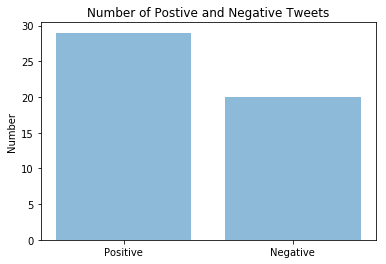

In [418]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Number of Postive and Negative Tweets')

plt.show()